In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 10  # تعداد بازوها
k = 5  # تعداد دسته‌ها
T = 1000  # تعداد مراحل
a = 0  # کمینه مقدار پاداش
b = 1  # بیشینه مقدار پاداش
epsilon = 0.1  # پارامتر ε برای الگوریتم ε-greedy
Q = np.zeros((k, n))  # مقادیر تخمینی پاداش هر بازو در هر دسته
N = np.zeros((k, n))  # تعداد بارهایی که هر بازو در هر دسته انتخاب شده است
rewards = np.zeros(T)  # مقادیر پاداش در هر مرحله

In [2]:
def get_reward(d, a, b):
    return np.random.uniform(a, b)  # تولید پاداش با توزیع یکنواخت در بازه [a, b]

for t in range(T):
    if np.random.rand() < epsilon:
        # بازوی تصادفی انتخاب می‌شود
        arm = np.random.randint(n)
        group = np.random.randint(k)
    else:
        # بازوی با بیشترین تخمین پاداش انتخاب می‌شود
        arm = np.argmax(Q, axis=1)
        group = np.random.choice(np.where(arm == np.max(arm))[0])
        arm = np.random.choice(np.where(arm == np.max(arm))[0])
        
    reward = get_reward(group, a, b)  # پاداش به صورت تصادفی تولید می‌شود
    N[group, arm] += 1
    Q[group, arm] += (1 / N[group, arm]) * (reward - Q[group, arm])
    rewards[t] = reward


In [5]:
for i in range(k):
    best_arm = np.argmax(Q[i, :])
    print(f"The most rewarding arm in the category {i+1}: {best_arm+1} with reward {Q[i, best_arm]:.2f}")


The most rewarding arm in the category 1: 1 with reward 0.87
The most rewarding arm in the category 2: 4 with reward 0.97
The most rewarding arm in the category 3: 10 with reward 0.86
The most rewarding arm in the category 4: 7 with reward 0.83
The most rewarding arm in the category 5: 4 with reward 0.67


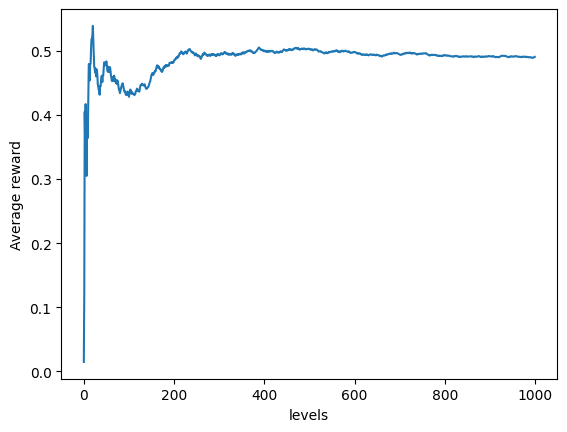

In [6]:
plt.plot(np.cumsum(rewards) / (np.arange(T) + 1))
plt.xlabel("levels")
plt.ylabel("Average reward")
plt.show()
